# EDA on 'merged_v2.csv' file.

- In this notebook, we shall perform eda on the merged isda and ipage dataset.

In [1]:
# importing the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# path to load the dataset

merged_data_path =  "/content/drive/MyDrive/ipage_ai_innovation/merged_v2.csv"

# loading the data

merged_data = pd.read_csv(merged_data_path)

In [3]:
merged_data.columns

Index(['longitude', 'latitude', 'Area', 'Soil group', 'Land class',
       'Soil type', 'pH', 'SOC', 'Nitrogen', 'Potassium', 'Phosphorus',
       'Sulfur', 'Boron', 'Zinc', 'Sand', 'Silt', 'Clay'],
      dtype='object')

In [4]:
# Renaming columns
merged_data.rename(columns={'Soil group': 'Soil_group', 'Land class': 'Land_class', 'Soil type': 'Soil_type'}, inplace=True)

In [5]:
# dropping the SOC and Boron columns:

merged_data = merged_data.drop(['SOC', 'Boron'], axis=1)

In [6]:
merged_data.columns

Index(['longitude', 'latitude', 'Area', 'Soil_group', 'Land_class',
       'Soil_type', 'pH', 'Nitrogen', 'Potassium', 'Phosphorus', 'Sulfur',
       'Zinc', 'Sand', 'Silt', 'Clay'],
      dtype='object')

In [7]:
# What is the shape of the data?

merged_data.shape

(2584, 15)

In [8]:
# How do the first and the last few rows of the dataset look like?

# first 15
merged_data.head(15)

,longitude,latitude,Area,Soil_group,Land_class,Soil_type,pH,Nitrogen,Potassium,Phosphorus,Sulfur,Zinc,Sand,Silt,Clay
0,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.0,0.08,0.15,19.60,37.7,0.86,33.0,33.0,33.0
1,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.9,0.09,0.25,4.10,32.0,0.75,33.0,33.0,33.0
2,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.6,0.05,0.09,13.30,13.5,0.95,33.0,33.0,33.0
3,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.2,0.06,0.30,20.20,30.0,1.00,33.0,33.0,33.0
4,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.3,0.11,0.17,20.50,27.8,1.04,33.0,33.0,33.0
5,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.9,0.08,0.35,21.70,27.8,1.16,33.0,33.0,33.0
6,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.8,0.06,0.29,7.70,39.7,0.88,33.0,33.0,33.0
7,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.2,0.08,0.50,18.50,25.6,1.05,33.0,33.0,33.0
8,89.2767,25.5678,Mithpukur,Noadda,high ground,Clay loam,5.3,0.08,0.17,12.00,26.4,0.74,33.0,33.0,33.0
9,89.2767,25.5678,Mithpukur,Noadda,high ground,Clay loam,5.0,0.06,0.18,0.06,10.7,0.91,33.0,33.0,33.0


In [9]:
# last 15

merged_data.tail(15)

,longitude,latitude,Area,Soil_group,Land_class,Soil_type,pH,Nitrogen,Potassium,Phosphorus,Sulfur,Zinc,Sand,Silt,Clay
2569,6.94642,11.12360,isda,isda,isda,isda,5.86296,0.043368,0.165479,4.37794,7.74192,0.863370,63.0,19.0,16.0
2570,5.08187,10.26989,isda,isda,isda,isda,6.13110,0.019946,0.051824,5.69199,3.49763,1.069300,73.0,16.0,12.0
2571,5.36081,10.61764,isda,isda,isda,isda,6.11732,0.038009,0.191717,7.21047,9.28102,0.864146,75.0,15.0,12.0
2572,8.46271,8.44637,isda,isda,isda,isda,6.51239,0.027794,0.105385,5.26273,5.58958,0.711621,73.0,18.0,11.0
2573,8.65287,8.38496,isda,isda,isda,isda,6.44842,0.023189,0.165479,5.21956,5.34343,0.626419,70.0,19.0,15.0
2574,5.32360,9.55153,isda,isda,isda,isda,6.34957,0.028294,0.107011,3.78928,7.06613,1.340680,69.0,19.0,14.0
2575,6.07467,9.46883,isda,isda,isda,isda,6.29708,0.025033,0.141833,3.43501,4.43581,0.987121,70.0,17.0,13.0
2576,7.65472,11.58962,isda,isda,isda,isda,5.72781,0.025954,0.183486,5.06168,5.41389,1.391090,58.0,23.0,20.0
2577,5.02394,10.28686,isda,isda,isda,isda,6.19223,0.052833,0.204559,11.30770,5.50195,1.759930,73.0,17.0,11.0
2578,11.35612,9.12813,isda,isda,isda,isda,5.76453,0.028507,0.171297,4.57492,4.93855,0.828437,54.0,22.0,25.0


In [10]:
# what are the data types of each of the features?

merged_data.dtypes

,0
longitude,float64
latitude,float64
Area,object
Soil_group,object
Land_class,object
Soil_type,object
pH,float64
Nitrogen,float64
Potassium,float64
Phosphorus,float64


In [11]:
# what are the number of unique values for each feature?

merged_data.nunique()

,0
longitude,2106
latitude,2095
Area,6
Soil_group,23
Land_class,6
Soil_type,7
pH,2117
Nitrogen,2142
Potassium,1536
Phosphorus,2391


In [12]:
# does the data have any missing values?

merged_data.isnull().sum()

,0
longitude,0
latitude,0
Area,0
Soil_group,0
Land_class,0
Soil_type,0
pH,0
Nitrogen,0
Potassium,0
Phosphorus,0


### Initial Observations:

- The dataset has 2584 rows and 17 columns.
- No data available for isda data for the features ***area, soil group, land class, soil type***.
- Data is a mix of float and categorical features.
- There are no missing values in the dataset.

### Univariate Analysis:

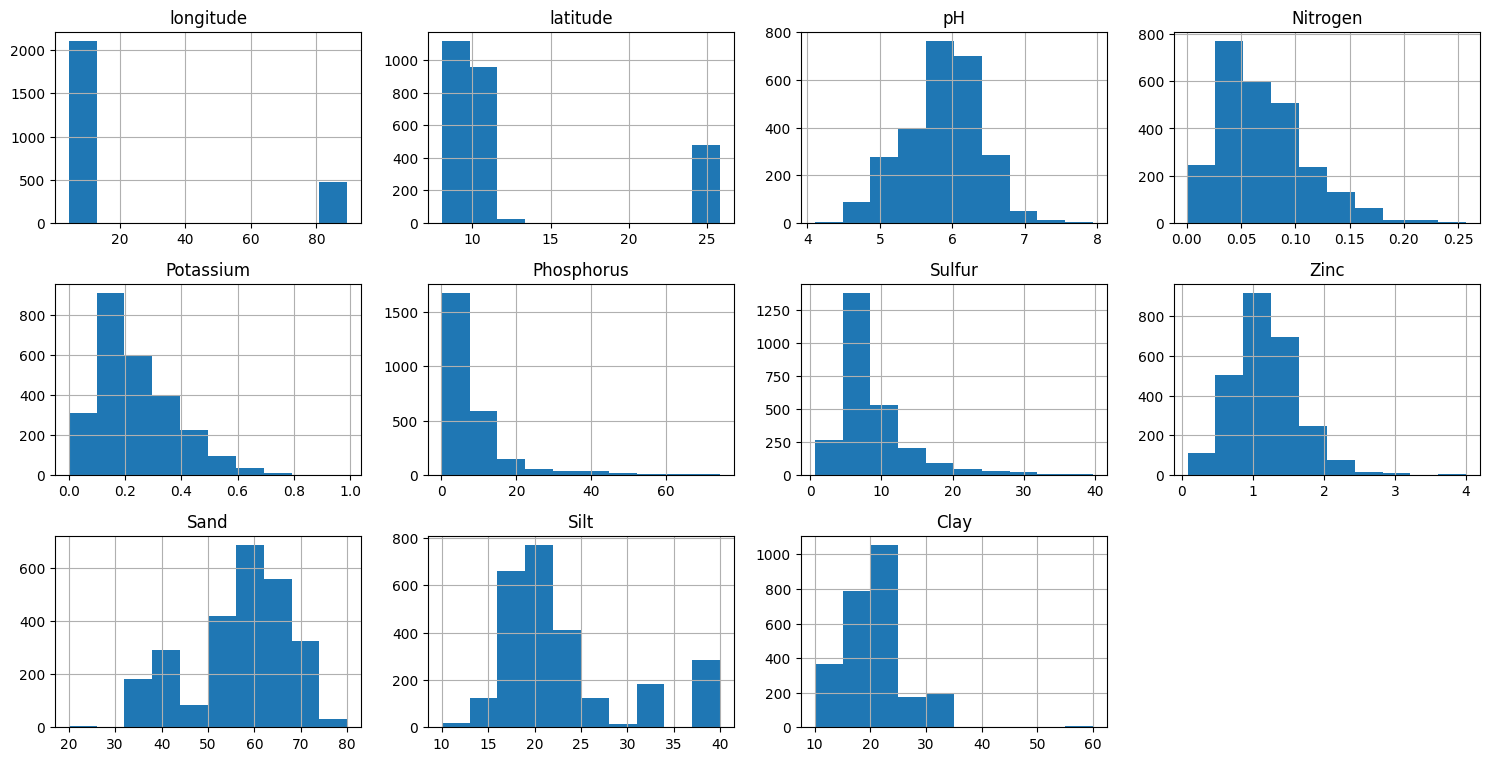

In [13]:
# How are the continuous features distributed?

merged_data.hist(bins=10, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

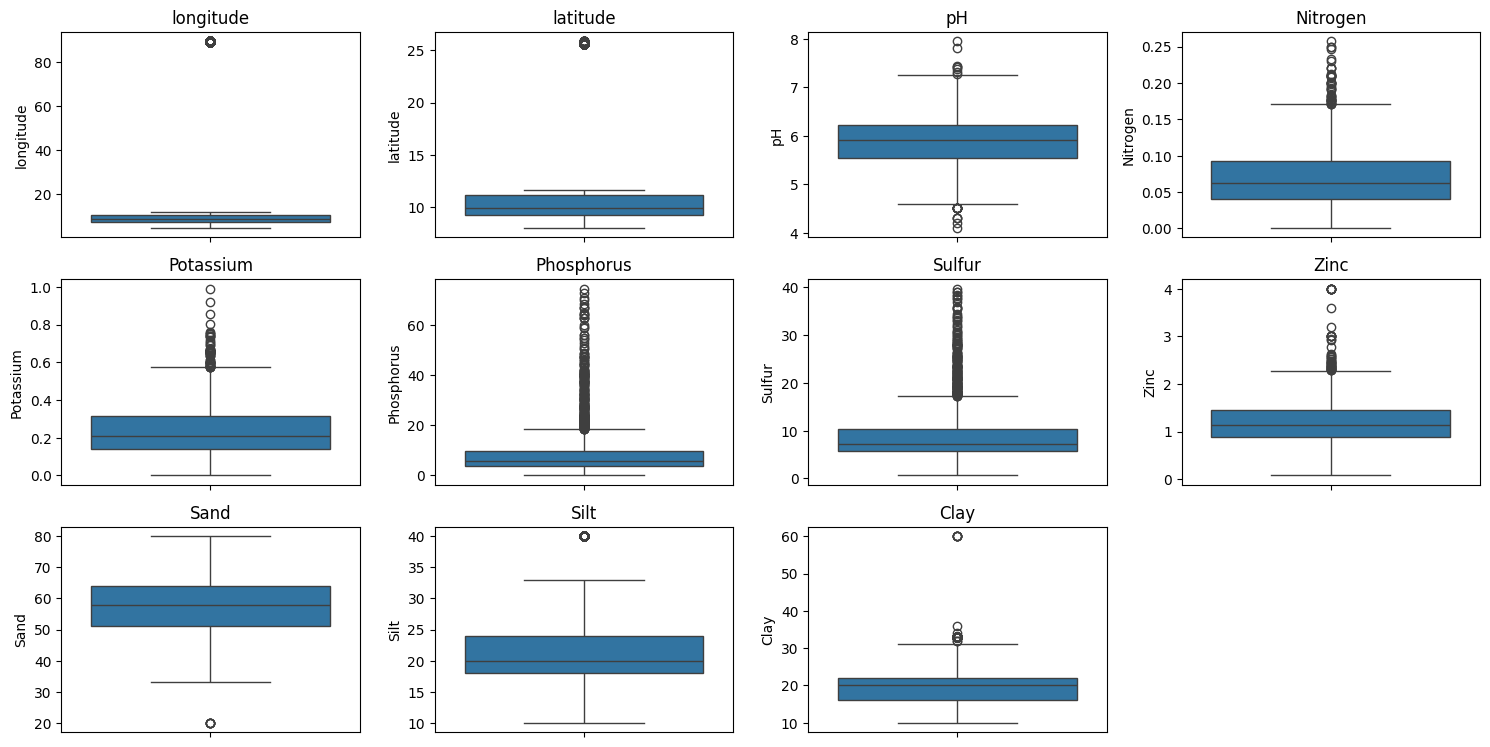

In [14]:
# Are there any outliers in the continuous features?

plt.figure(figsize=(15, 10))
for i, column in enumerate(merged_data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=merged_data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [15]:
# checking column names.

merged_data.columns

Index(['longitude', 'latitude', 'Area', 'Soil_group', 'Land_class',
       'Soil_type', 'pH', 'Nitrogen', 'Potassium', 'Phosphorus', 'Sulfur',
       'Zinc', 'Sand', 'Silt', 'Clay'],
      dtype='object')

In [16]:
# What is the relationship between the continuous features?

# considering only the continous columns, dropping the categorical columns
merged_numeric = merged_data.drop(['Area', 'Soil_group', 'Land_class','Soil_type'], axis=1)


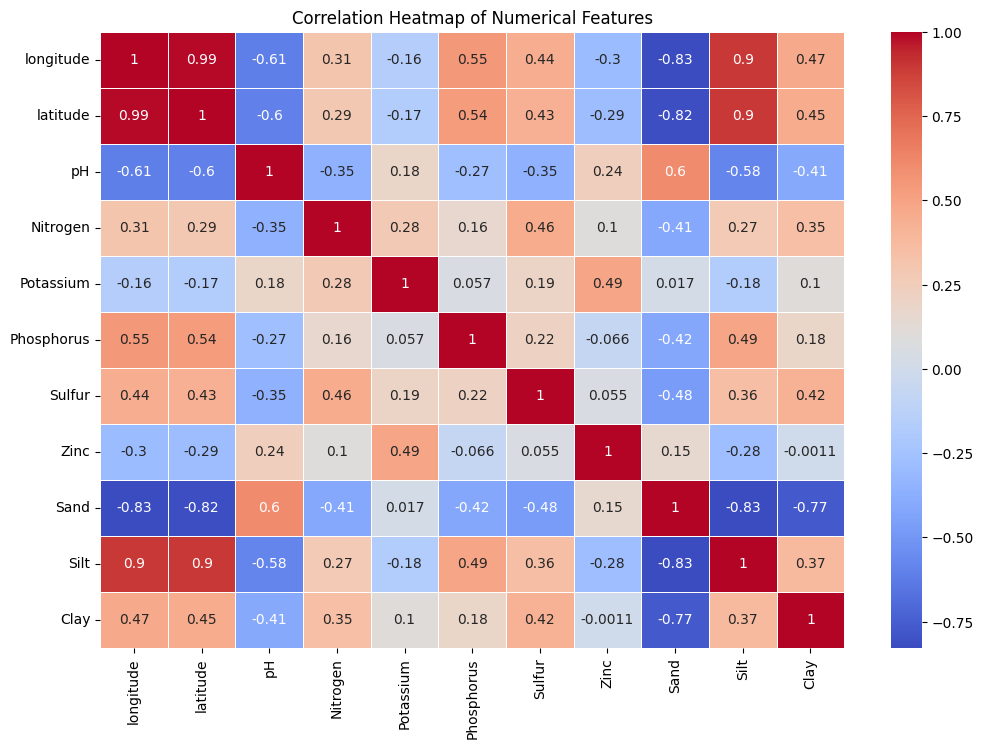

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = merged_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [18]:
# CATEGORICAL FEATURES: Area, Soil group, Land class, Soil Type


# AREA:
# How many unique values are there in the Area feature?

merged_data['Area'].unique()


array(['Mithpukur', 'Pirgacha ', 'Gangachara', 'Kaunia upazila',
       'Taraganj Thana', 'isda'], dtype=object)

In [19]:
# What are the value counts for each area?

merged_data['Area'].value_counts()

,count
Area,
isda,2107
Mithpukur,186
Pirgacha,125
Taraganj Thana,79
Kaunia upazila,65
Gangachara,22


<ipython-input-20-26498c0d16cf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(merged_data['Area'], palette='viridis')


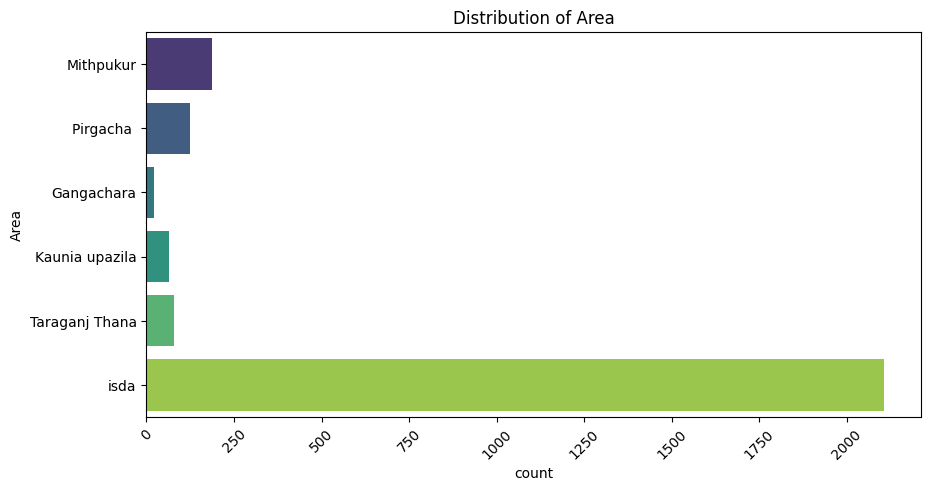

In [20]:
# Plotting:

plt.figure(figsize=(10, 5))
sns.countplot(merged_data['Area'], palette='viridis')
plt.title(f'Distribution of Area')
plt.xticks(rotation=45)
plt.show()


In [21]:
# SOIL GROUP:
# How many unique values are there in the Soil group feature?

merged_data['Soil_group'].unique()

array(['belab', 'Noadda', 'Sahapur', 'the moon', 'the pen', 'Khilgaon',
       'Pirgacha', 'Palashbari', 'Berries', 'Gangachara', 'Kaunia',
       'Imadpur', 'Alluvial soil of Teesta', 'Teesta sandy soil',
       'Kachna', 'The militants', 'Chilmari', 'Saghata', 'recession',
       'Menanagar', 'Bhimpur', 'Indrail', 'isda'], dtype=object)

In [22]:
# What are the value counts for each soil group?

merged_data['Soil_group'].value_counts()

,count
Soil_group,
isda,2107
Gangachara,206
Kaunia,55
Palashbari,37
Berries,31
Alluvial soil of Teesta,22
the moon,18
belab,17
Sahapur,16


<ipython-input-23-0ee874faef26>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(merged_data['Soil_group'], palette='viridis')


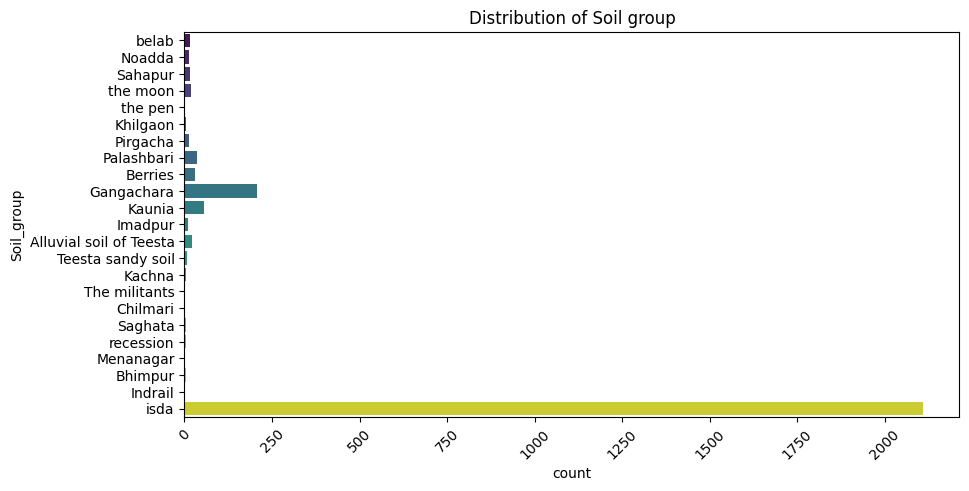

In [23]:
# Plotting:

plt.figure(figsize=(10, 5))
sns.countplot(merged_data['Soil_group'], palette='viridis')
plt.title(f'Distribution of Soil group')
plt.xticks(rotation=45)
plt.show()

In [24]:
# LAND CLASS:
# How many unique values are there in the Land class feature?

merged_data['Land_class'].unique()

array(['high ground', 'Medium high land', 'Medium low land',
       'Deep medium high land', 'Shallow to medium high land', 'isda'],
      dtype=object)

In [25]:
# What are the value counts for each land class?

merged_data['Land_class'].value_counts()

,count
Land_class,
isda,2107
Medium high land,262
high ground,188
Medium low land,22
Shallow to medium high land,3
Deep medium high land,2


<ipython-input-26-976bfcd08f28>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(merged_data['Land_class'], palette='viridis')


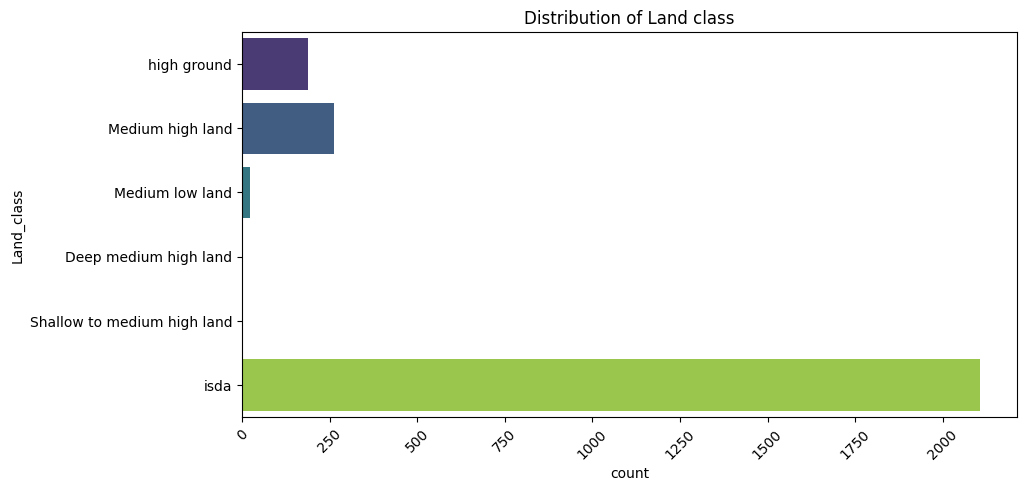

In [26]:
# Plotting:

plt.figure(figsize=(10, 5))
sns.countplot(merged_data['Land_class'], palette='viridis')
plt.title(f'Distribution of Land class')
plt.xticks(rotation=45)
plt.show()

In [27]:
# SOIL TYPE:
# How many unique values are there in the Soil type feature?

merged_data['Soil_type'].unique()

array(['Clay loam ', 'loam', 'brick', 'in the sand', 'unknown',
       'loam clay', 'isda'], dtype=object)

In [28]:
# What are the value counts for each land class?

merged_data['Soil_type'].value_counts()

,count
Soil_type,
isda,2107
loam,286
unknown,101
Clay loam,70
loam clay,11
brick,6
in the sand,3


<ipython-input-29-b0528c11b352>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(merged_data['Soil_type'], palette='viridis')


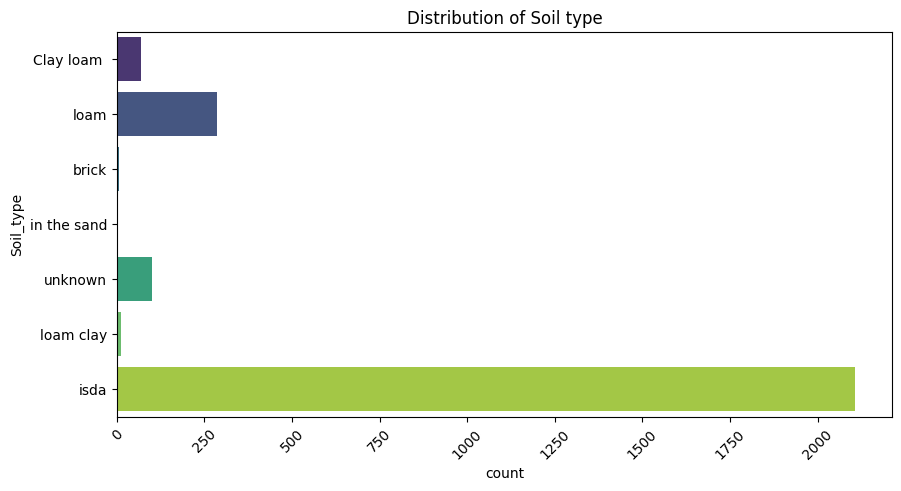

In [29]:
# Plotting:

plt.figure(figsize=(10, 5))
sns.countplot(merged_data['Soil_type'], palette='viridis')
plt.title(f'Distribution of Soil type')
plt.xticks(rotation=45)
plt.show()

### Univariate Analysis Observations:

- Most of the features are right skewed.
- There are outliers in the continuous features.
- There's hardly any strong correlation between the features, either positive or negative.
- For the categorical features, isda category outweighs all the other categories in all of the categorical features.
- Zinc is positively correlated to potassium and mildly positively correlated to pH value.

### Question:
- What is to be done with the 'isda' values?
- In the categorical features there are categories having one, two or five values. Should we team them up to create an 'other' feature?
- Should we consider latitude and longitude representative of the Area, Land class, Soil type and Soil group features? It would help in eliminating the how to treat the isda category in the categorical features.

### Bi-variate Analysis(with respect to ***zinc***):

Text(0.5, 1.0, 'Relationship between Zinc and Area features')

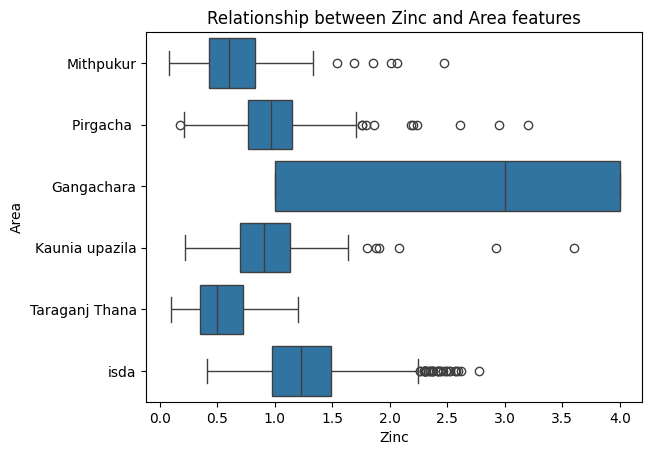

In [30]:
# plotting realtionship between zinc and Area features

sns.boxplot(data=merged_data, x='Zinc', y='Area')
plt.title("Relationship between Zinc and Area features")

Text(0.5, 1.0, 'Relationship between Zinc and Soil group features')

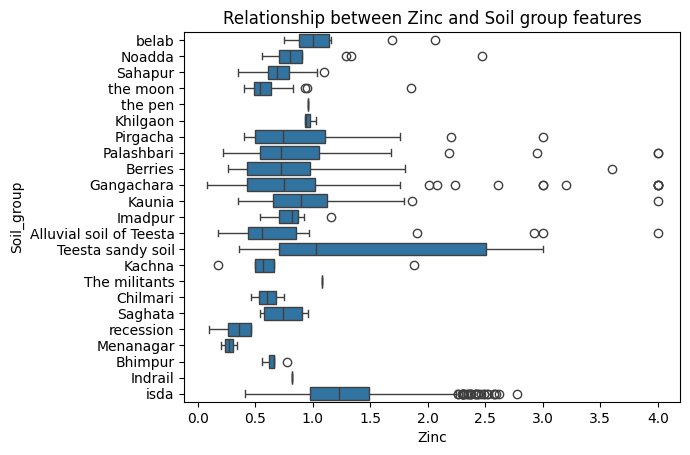

In [31]:
# plotting realtionship between zinc and Soil group features

sns.boxplot(data=merged_data, x='Zinc', y='Soil_group')
plt.title("Relationship between Zinc and Soil group features")

Text(0.5, 1.0, 'Relationship between Zinc and Land class features')

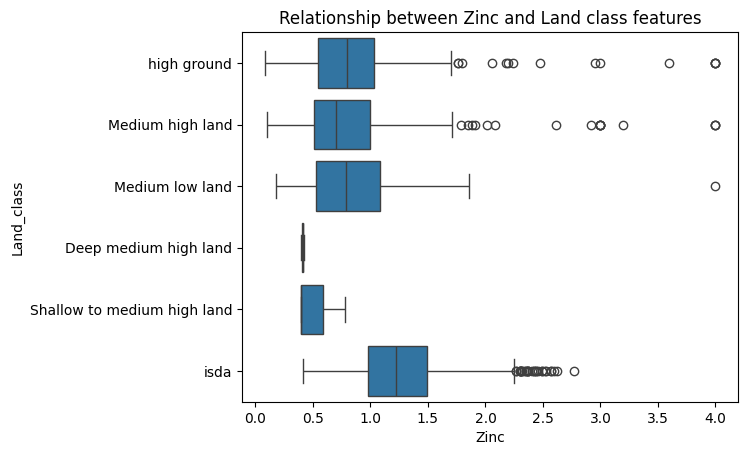

In [32]:
# plotting realtionship between zinc and Land class features

sns.boxplot(data=merged_data, x='Zinc', y='Land_class')
plt.title("Relationship between Zinc and Land class features")

Text(0.5, 1.0, 'Relationship between Zinc and Soil type features')

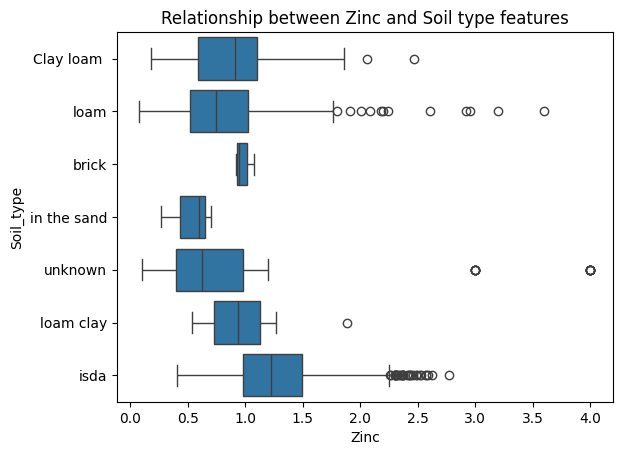

In [33]:
# plotting realtionship between zinc and Soil type features

sns.boxplot(data=merged_data, x='Zinc', y='Soil_type')
plt.title("Relationship between Zinc and Soil type features")

### Bivariate Analysis Observations:

- The average **Zinc** values somewhat **differ** for different **Areas**.
- The average **Zinc** values somewhat **differ** for different **Soil group**.
- **Not much difference** between the average **zinc** values accross **Land class** and **Soil type** features.

### Hypothesis Testing(One way ANOVA):

- Ho: Means across the categories are same
- Ha: Means across the categories are different

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Anova for Zinc and Area features

model = ols('Zinc ~ Area',                 # Model formula
            data = merged_data).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

# We reject the Ho, the mean Zinc values across different Area differ.

              sum_sq      df           F         PR(>F)
Area      145.251088     5.0  175.489317  4.599538e-161
Residual  426.757949  2578.0         NaN            NaN


In [35]:
# Anova for Zinc and Soil group features

model = ols('Zinc ~ Soil_group',                 # Model formula
            data = merged_data).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

# We reject the Ho, the mean Zinc values across different Soil_group differ.

                sum_sq      df          F        PR(>F)
Soil_group   62.667643    22.0  14.322581  2.678479e-50
Residual    509.341394  2561.0        NaN           NaN


In [36]:
# Anova for Zinc and Land class features

model = ols('Zinc ~ Land_class',                 # Model formula
            data = merged_data).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

# We reject the Ho, the mean Zinc values across different Land_class differ.

                sum_sq      df          F        PR(>F)
Land_class   54.884666     5.0  54.722878  3.563143e-54
Residual    517.124371  2578.0        NaN           NaN


In [37]:
# Anova for Zinc and Soil type features

model = ols('Zinc ~ Soil_type',                 # Model formula
            data = merged_data).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

# We reject the Ho, the mean Zinc values across different Soil_type differ.

               sum_sq      df          F        PR(>F)
Soil_type   55.937736     6.0  46.554144  2.088348e-54
Residual   516.071301  2577.0        NaN           NaN


# Feature Engineering

In [38]:
# We have seen in the visualizations that the continuous features might be skewed
# checking the skewness of the same.

merged_numeric.skew(axis = 0)

# We can see that some columns are positively skewed and 'pH' and 'Sand' are negatively skewed.
# We will need to treat those to get the desired results.

,0
longitude,1.616018
latitude,1.561540
pH,-0.247267
Nitrogen,1.009825
Potassium,0.985205
Phosphorus,3.351142
Sulfur,2.310504
Zinc,1.099748
Sand,-0.699432
Silt,1.301490


In [39]:
# creating a copy of our dataframe

merged_data_fe = merged_data.copy()

In [40]:
# checking the columns for the merged_data_fe:
merged_data_fe.columns

Index(['longitude', 'latitude', 'Area', 'Soil_group', 'Land_class',
       'Soil_type', 'pH', 'Nitrogen', 'Potassium', 'Phosphorus', 'Sulfur',
       'Zinc', 'Sand', 'Silt', 'Clay'],
      dtype='object')

In [41]:
# Checking if zero is present in any columns before taking log transform:

# Check if zero is present in column 'A'
if 0 in merged_data_fe['longitude'].values:
    print("Zero is present.")
else:
    print("Zero is not present.")

Zero is not present.


In [42]:
if 0 in merged_data_fe['latitude'].values:
    print("Zero is present.")
else:
    print("Zero is not present.")

Zero is not present.


In [43]:
if 0 in merged_data_fe['Nitrogen'].values:
    print("Zero is present.")
else:
    print("Zero is not present.")

Zero is not present.


In [44]:
if 0 in merged_data_fe['Potassium'].values:
    print("Zero is present.")
else:
    print("Zero is not present.")

Zero is present.


In [45]:
if 0 in merged_data_fe['Phosphorus'].values:
    print("Zero is present.")
else:
    print("Zero is not present.")

Zero is not present.


In [46]:
if 0 in merged_data_fe['Sulfur'].values:
    print("Zero is present.")
else:
    print("Zero is not present.")

Zero is not present.


In [47]:
if 0 in merged_data_fe['Silt'].values:
    print("Zero is present.")
else:
    print("Zero is not present.")

Zero is not present.


In [48]:
if 0 in merged_data_fe['Clay'].values:
    print("Zero is present.")
else:
    print("Zero is not present.")

Zero is not present.


In [49]:
# We can see that 0 is present in the 'Potassium' column, we shall remove those rows as log transform will lead to infinite
# value

merged_data_fe = merged_data_fe.loc[merged_data_fe['Potassium'] != 0]



In [50]:
# cross checking if there are any zero values:

if 0 in merged_data_fe['Potassium'].values:
    print("Zero is present.")
else:
    print("Zero is not present.")

# zero has been removed.
# now we can move to the log transforms.

Zero is not present.


In [51]:
# As we can see that the data has skewness we shall treat the features accordingly:

# Taking the natural log for the right skewed columns:
merged_data_fe['longitude_log'] = np.log(merged_data_fe['longitude'])
merged_data_fe['latitude_log'] = np.log(merged_data_fe['latitude'])
merged_data_fe['Nitrogen_log'] = np.log(merged_data_fe['Nitrogen'])
merged_data_fe['Potassium_log'] = np.log(merged_data_fe['Potassium'])
merged_data_fe['Phosphorus_log'] = np.log(merged_data_fe['Phosphorus'])
merged_data_fe['Sulfur_log'] = np.log(merged_data_fe['Sulfur'])
merged_data_fe['Silt_log'] = np.log(merged_data_fe['Silt'])
merged_data_fe['Clay_log'] = np.log(merged_data_fe['Clay'])



In [52]:
# Taking the square of the left skewed data:

merged_data_fe['pH_square'] = np.square(merged_data_fe['pH'])
merged_data_fe['Sand_square'] = np.square(merged_data_fe['Sand'])

In [53]:
# checking the columns

merged_data_fe.columns

Index(['longitude', 'latitude', 'Area', 'Soil_group', 'Land_class',
       'Soil_type', 'pH', 'Nitrogen', 'Potassium', 'Phosphorus', 'Sulfur',
       'Zinc', 'Sand', 'Silt', 'Clay', 'longitude_log', 'latitude_log',
       'Nitrogen_log', 'Potassium_log', 'Phosphorus_log', 'Sulfur_log',
       'Silt_log', 'Clay_log', 'pH_square', 'Sand_square'],
      dtype='object')

In [54]:
# Now that we have dealt with the continuous columns, lets transform the categorical columns:

merged_data_fe = pd.get_dummies(merged_data_fe, columns=['Area', 'Soil_group', 'Land_class', 'Soil_type'], drop_first=True, dtype='int')


In [55]:
# checking out the columns:

merged_data_fe.columns

Index(['longitude', 'latitude', 'pH', 'Nitrogen', 'Potassium', 'Phosphorus',
       'Sulfur', 'Zinc', 'Sand', 'Silt', 'Clay', 'longitude_log',
       'latitude_log', 'Nitrogen_log', 'Potassium_log', 'Phosphorus_log',
       'Sulfur_log', 'Silt_log', 'Clay_log', 'pH_square', 'Sand_square',
       'Area_Kaunia upazila', 'Area_Mithpukur', 'Area_Pirgacha ',
       'Area_Taraganj Thana', 'Area_isda', 'Soil_group_Berries',
       'Soil_group_Bhimpur', 'Soil_group_Chilmari', 'Soil_group_Gangachara',
       'Soil_group_Imadpur', 'Soil_group_Indrail', 'Soil_group_Kachna',
       'Soil_group_Kaunia', 'Soil_group_Khilgaon', 'Soil_group_Menanagar',
       'Soil_group_Noadda', 'Soil_group_Palashbari', 'Soil_group_Pirgacha',
       'Soil_group_Saghata', 'Soil_group_Sahapur',
       'Soil_group_Teesta sandy soil', 'Soil_group_The militants',
       'Soil_group_belab', 'Soil_group_isda', 'Soil_group_recession',
       'Soil_group_the moon', 'Soil_group_the pen',
       'Land_class_Medium high land', '

In [56]:
# now we will drop the original columns to create a final dataframe:

merged_data_final = merged_data_fe.drop(['longitude', 'latitude', 'pH', 'Nitrogen', 'Potassium', 'Phosphorus',
                                         'Sulfur', 'Sand', 'Silt', 'Clay'], axis=1)

merged_data_final.columns

Index(['Zinc', 'longitude_log', 'latitude_log', 'Nitrogen_log',
       'Potassium_log', 'Phosphorus_log', 'Sulfur_log', 'Silt_log', 'Clay_log',
       'pH_square', 'Sand_square', 'Area_Kaunia upazila', 'Area_Mithpukur',
       'Area_Pirgacha ', 'Area_Taraganj Thana', 'Area_isda',
       'Soil_group_Berries', 'Soil_group_Bhimpur', 'Soil_group_Chilmari',
       'Soil_group_Gangachara', 'Soil_group_Imadpur', 'Soil_group_Indrail',
       'Soil_group_Kachna', 'Soil_group_Kaunia', 'Soil_group_Khilgaon',
       'Soil_group_Menanagar', 'Soil_group_Noadda', 'Soil_group_Palashbari',
       'Soil_group_Pirgacha', 'Soil_group_Saghata', 'Soil_group_Sahapur',
       'Soil_group_Teesta sandy soil', 'Soil_group_The militants',
       'Soil_group_belab', 'Soil_group_isda', 'Soil_group_recession',
       'Soil_group_the moon', 'Soil_group_the pen',
       'Land_class_Medium high land', 'Land_class_Medium low land',
       'Land_class_Shallow to medium high land', 'Land_class_high ground',
       'Land_c

In [57]:
merged_data_final.head(5)

,Zinc,longitude_log,latitude_log,Nitrogen_log,Potassium_log,Phosphorus_log,Sulfur_log,Silt_log,Clay_log,pH_square,...,Land_class_Medium low land,Land_class_Shallow to medium high land,Land_class_high ground,Land_class_isda,Soil_type_brick,Soil_type_in the sand,Soil_type_isda,Soil_type_loam,Soil_type_loam clay,Soil_type_unknown
0,0.86,4.491741,3.241334,-2.525729,-1.897120,2.975530,3.629660,3.496508,3.496508,25.00,...,0,0,1,0,0,0,0,0,0,0
1,0.75,4.491741,3.241334,-2.407946,-1.386294,1.410987,3.465736,3.496508,3.496508,24.01,...,0,0,1,0,0,0,0,0,0,0
2,0.95,4.491741,3.241334,-2.995732,-2.407946,2.587764,2.602690,3.496508,3.496508,21.16,...,0,0,1,0,0,0,0,0,0,0
3,1.00,4.491741,3.241334,-2.813411,-1.203973,3.005683,3.401197,3.496508,3.496508,27.04,...,0,0,1,0,0,0,0,0,0,0
4,1.04,4.491741,3.241334,-2.207275,-1.771957,3.020425,3.325036,3.496508,3.496508,28.09,...,0,0,1,0,0,0,0,0,0,0


In [58]:
merged_data_final.tail(5)

,Zinc,longitude_log,latitude_log,Nitrogen_log,Potassium_log,Phosphorus_log,Sulfur_log,Silt_log,Clay_log,pH_square,...,Land_class_Medium low land,Land_class_Shallow to medium high land,Land_class_high ground,Land_class_isda,Soil_type_brick,Soil_type_in the sand,Soil_type_isda,Soil_type_loam,Soil_type_loam clay,Soil_type_unknown
2579,0.911567,1.687435,2.299250,-3.467350,-1.814827,1.221287,1.892653,2.944439,2.639057,37.270903,...,0,0,0,1,0,0,1,0,0,0
2580,0.882494,1.803357,2.249002,-3.556466,-1.942436,1.394099,1.750390,2.833213,2.564949,39.891982,...,0,0,0,1,0,0,1,0,0,0
2581,1.039760,2.157686,2.123998,-2.773378,-1.452927,0.930067,2.173973,2.995732,2.708050,34.369727,...,0,0,0,1,0,0,1,0,0,0
2582,0.858591,2.433310,2.213321,-3.389815,-2.082857,2.261808,1.677095,3.091042,2.944439,35.699430,...,0,0,0,1,0,0,1,0,0,0
2583,0.847897,2.156296,2.126530,-3.844967,-2.212393,1.442027,1.595120,2.890372,2.639057,38.731454,...,0,0,0,1,0,0,1,0,0,0


# Modelling

In [59]:
# importing the required libraries:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [60]:
# Define X variables and our target(Zinc)

X = merged_data_final.drop(["Zinc"],axis=1).values
y = merged_data_final["Zinc"].values
print("X : ",X.shape," y : ",y.shape)

X :  (2583, 48)  y :  (2583,)


In [61]:
# splitting the dataset as train and test:


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state=42)

In [62]:
# Model metrics:

# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Output the results
    print(f"{model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R²): {r2}")
    print("\n")


In [63]:
# Models:

tree_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)


In [64]:
# Call the function for each model

evaluate_model(tree_model, X_train, y_train, X_test, y_test, "Decision Tree")


Decision Tree
Mean Squared Error (MSE): 0.21894484485046803
Mean Absolute Error (MAE): 0.3373664100580271
R-squared (R²): 0.06172609131914819




In [65]:
evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

Random Forest
Mean Squared Error (MSE): 0.12333604288457331
Mean Absolute Error (MAE): 0.25935656141199226
R-squared (R²): 0.4714514008421954


